In [48]:
import numpy as np
import pandas as pd
import seaborn as sns
import pandas.io.sql as sqlio
import psycopg2 as ps
import matplotlib.pyplot as plt

In [49]:
conn = ps.connect(dbname="Proje",
                  user="postgres",
                  password="12345",
                  port = "5432")

# 5)	Ülkelere Göre Toplam Sipariş Sayısı CASE 1

In [50]:
sql = """
SELECT 
    c.Country,
    COUNT(o.order_id) AS TotalOrders
FROM 
    Customers c
JOIN 
    Orders o ON c.customer_id = o.customer_id
GROUP BY 
    c.Country
ORDER BY 
    TotalOrders DESC;
"""

In [51]:
df = sqlio.read_sql_query(sql,conn)
df.head()

C:\Users\nazlit\AppData\Local\Temp\ipykernel_17820\1600180838.py:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = sqlio.read_sql_query(sql,conn)


,country,totalorders
0,Germany,122
1,USA,122
2,Brazil,83
3,France,77
4,UK,56


In [52]:
df.shape

(21, 2)

In [53]:
print(df.head())

   country  totalorders
0  Germany          122
1      USA          122
2   Brazil           83
3   France           77
4       UK           56


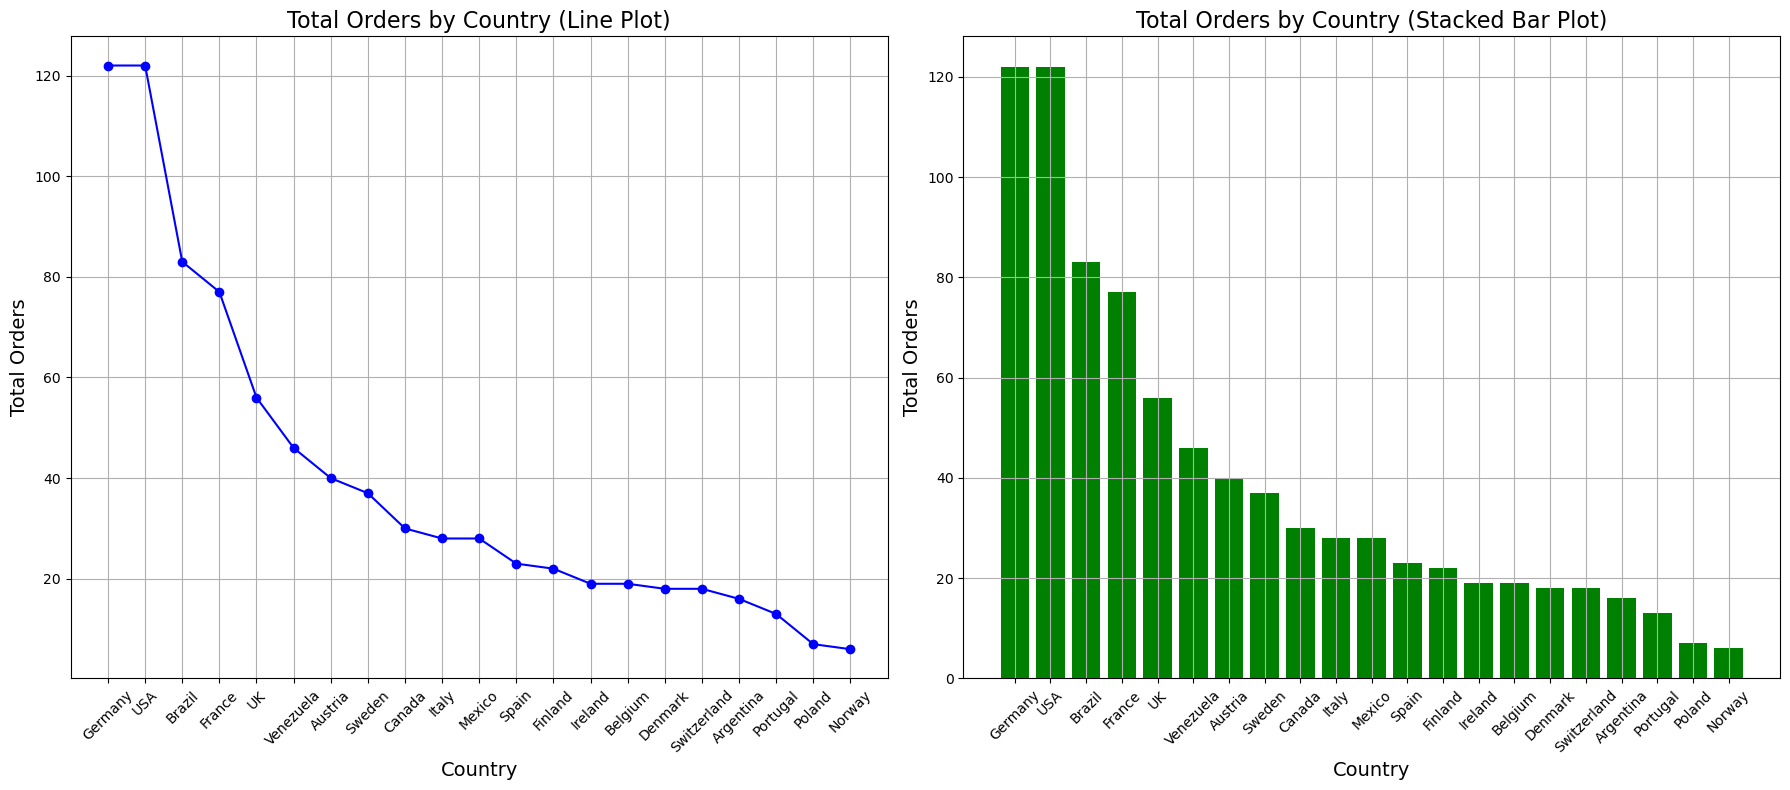

In [54]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(18, 8))

# Çizgi grafiği
axes[0].plot(df['country'], df['totalorders'], marker='o', color='blue', linestyle='-')
axes[0].set_title('Total Orders by Country (Line Plot)', fontsize=16)
axes[0].set_xlabel('Country', fontsize=14)
axes[0].set_ylabel('Total Orders', fontsize=14)
axes[0].tick_params(axis='x', rotation=45)
axes[0].grid(True)

# Yığılmış sütun grafiği
axes[1].bar(df['country'], df['totalorders'], color='green')
axes[1].set_title('Total Orders by Country (Stacked Bar Plot)', fontsize=16)
axes[1].set_xlabel('Country', fontsize=14)
axes[1].set_ylabel('Total Orders', fontsize=14)
axes[1].tick_params(axis='x', rotation=45)
axes[1].grid(True)

# Alt grafikler arasındaki boşluğu ayarla
plt.tight_layout()

# Grafiği göster
plt.show()

# YILLIK CİRO CASE 2#

In [55]:
sql = """
SELECT 
    DATE_TRUNC('year', o.order_date) AS year,
    SUM(od.quantity * od.unit_price * (1 - od.discount)) AS revenue
FROM 
    orders o
JOIN 
    order_details od ON o.order_id = od.order_id
GROUP BY 
    year
ORDER BY 
    year;
"""

In [56]:
df = sqlio.read_sql_query(sql,conn)
df.head()

C:\Users\nazlit\AppData\Local\Temp\ipykernel_17820\1600180838.py:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = sqlio.read_sql_query(sql,conn)


,year,revenue
0,1996-01-01 00:00:00+00:00,208083.970983
1,1997-01-01 00:00:00+00:00,617085.202393
2,1998-01-01 00:00:00+00:00,440623.865278


In [57]:
print(df.head())

                       year        revenue
0 1996-01-01 00:00:00+00:00  208083.970983
1 1997-01-01 00:00:00+00:00  617085.202393
2 1998-01-01 00:00:00+00:00  440623.865278


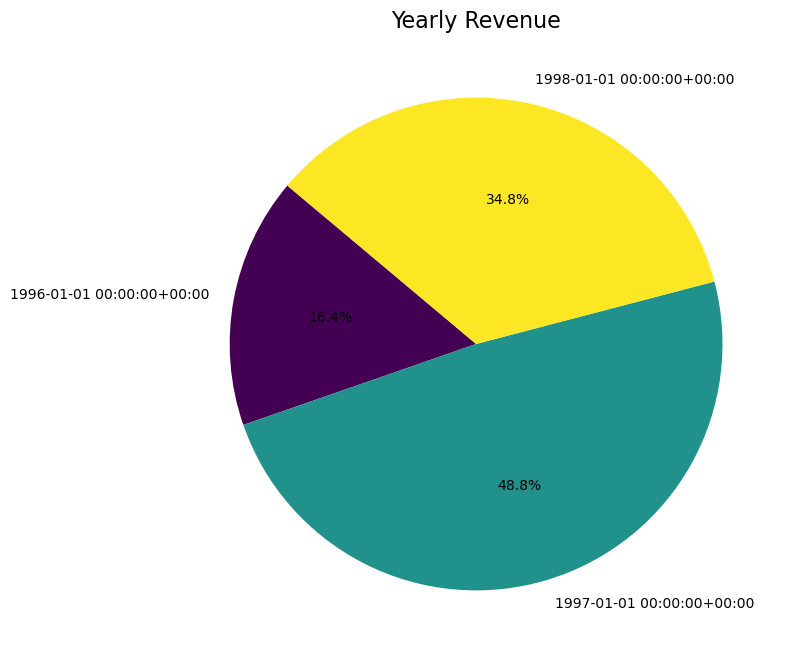

In [58]:
num_colors = len(df['year'])
colors = plt.cm.viridis(np.linspace(0, 1, num_colors))
plt.figure(figsize=(12, 8))
plt.pie(df['revenue'], labels=df['year'], autopct='%1.1f%%', startangle=140, colors=colors)
plt.title('Yearly Revenue', fontsize=16)
plt.show()